# Physicochemical features analysis: split into categorical and continuous variables 
Then a different correlation analysis will be applied based on this slip

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()
import numpy as np
import pandas as pd
plt.rcParams['figure.figsize'] = [6, 6]

In [1]:
%cd ..

/home/belu/VS Workplace/2021-re-pendleton-perovskite


In [72]:
import src.data.notebook_utils as utils

results = 'notebooks/results/'

df = utils.read_data()

columns_by_type = utils.get_columns(df.columns)
phy_chem_cols = list(columns_by_type['_feat_'])

In [73]:
unique_col_counts = [len(df[col].unique()) for col in phy_chem_cols]
unique_col_counts_values = list(set(unique_col_counts))
freq_count = [ unique_counts.count(count_value) for count_value in unique_col_counts_values]

cols_name_by_count = {}
for index_col, col in enumerate(phy_chem_cols):
    if unique_col_counts[index_col] in cols_name_by_count.keys(): 
        cols_name_by_count[unique_col_counts[index_col]].append(col)
    else: cols_name_by_count[unique_col_counts[index_col]] = [col]

[Text(0, 0.5, 'Cantidad de features'),
 Text(0.5, 0, 'Cantidad de valores distintos')]

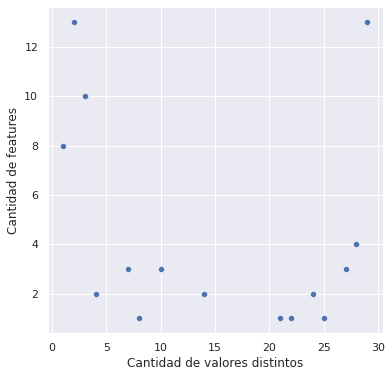

In [30]:
ax = sns.scatterplot(x=unique_col_counts_values, y=freq_count)
ax.set(ylabel='Cantidad de features', xlabel='Cantidad de valores distintos')

In [26]:
continuous_feats = list()
categorical_feats = list()
to_check_feats = list()
for key, value in cols_name_by_count.items():
    if key > 20: continuous_feats+=value
    elif key < 5: categorical_feats+=value
    else: to_check_feats+=value

In [61]:
names_col = ["Continuous var", "Categorical var", "To check"]
for i, cols_type in enumerate([continuous_feats, categorical_feats, to_check_feats]): print("#{}: {}".format(names_col[i], len(cols_type)))

#Continuous var: 25
#Categorical var: 33
#To check: 9


#### Categorical features includes:
    - Count of H donor/acceptor
    - Size of different ring's types (carboaliphatics, heteroaliphatics, carboaromatics, aromatics, heteroaromatics, etc)
    - Number of different functional-group fragments (only amines considered in this dataset): primary, secondary, aromatic amines, etc

In [34]:
print(categorical_feats)

['_feat_LargestRingSize', '_feat_AtomCount_N', '_feat_Hdonorcount', '_feat_acceptorcount', '_feat_fr_quatN', '_feat_SmallestRingSize', '_feat_donorcount', '_feat_Hacceptorcount', '_feat_RingAtomCount', '_feat_Accsitecount', '_feat_HeteroaliphaticRingCount', '_feat_fr_NH1', '_feat_CarboaliphaticRingCount', '_feat_fr_amidine', '_feat_fr_NH0', '_feat_fr_guanido', '_feat_CarboRingCount', '_feat_fr_Imine', '_feat_AliphaticRingCount', '_feat_CyclomaticNumber', '_feat_CarboaromaticRingCount', '_feat_AromaticRingCount', '_feat_AromaticAtomCount', '_feat_fr_dihydropyridine', '_feat_fr_ArN', '_feat_fr_piperzine', '_feat_fr_pyridine', '_feat_HeteroaromaticRing Count', '_feat_fr_Ar_NH', '_feat_fr_piperdine', '_feat_ChiralCenterCount', '_feat_donsitecount', '_feat_fr_NH2']


In [127]:
print(continuous_feats)

['_feat_MinimalProjectionRadius', '_feat_LengthPerpendicularToTheMinArea', '_feat_AvgPol', '_feat_minimalprojectionsize', '_feat_Refractivity', '_feat_maximalprojectionsize', '_feat_LengthPerpendicularToTheMaxArea', '_feat_MaximalProjectionRadius', '_feat_molsurfaceareaVDWp', '_feat_msareaASAp', '_feat_ASA_P', '_feat_VanderWaalsSurfaceArea', '_feat_ASA+', '_feat_VanderWaalsVolume', '_feat_msareaVDWp', '_feat_ASA', '_feat_MaximalProjectionArea', '_feat_ASA_H', '_feat_MinimalProjectionArea', '_feat_ASA-', '_feat_molsurfaceareaASAp', '_feat_MolPol', '_feat_BalabanIndex', '_feat_WienerIndex', '_feat_HyperWienerIndex']


### Manual categorization:
    - Categorical: _feat_ProtPolarSurfaceArea', '_feat_Protpsa', _feat_PolarSurfaceArea '_feat_RotatableBondCount? -> Low, Medium_ High
    - Continuous: rest

In [36]:
for key, value in cols_name_by_count.items():
    if key < 20 and key > 5: print("Columns: {} Count:{}".format(value, key))

Columns: ['_feat_WienerPolarity', '_feat_BondCount'] Count:14
Columns: ['_feat_AtomCount_C', '_feat_ChainAtomCount', '_feat_Aliphatic AtomCount'] Count:10
Columns: ['_feat_ProtPolarSurfaceArea', '_feat_Protpsa', '_feat_RotatableBondCount'] Count:7
Columns: ['_feat_PolarSurfaceArea'] Count:8


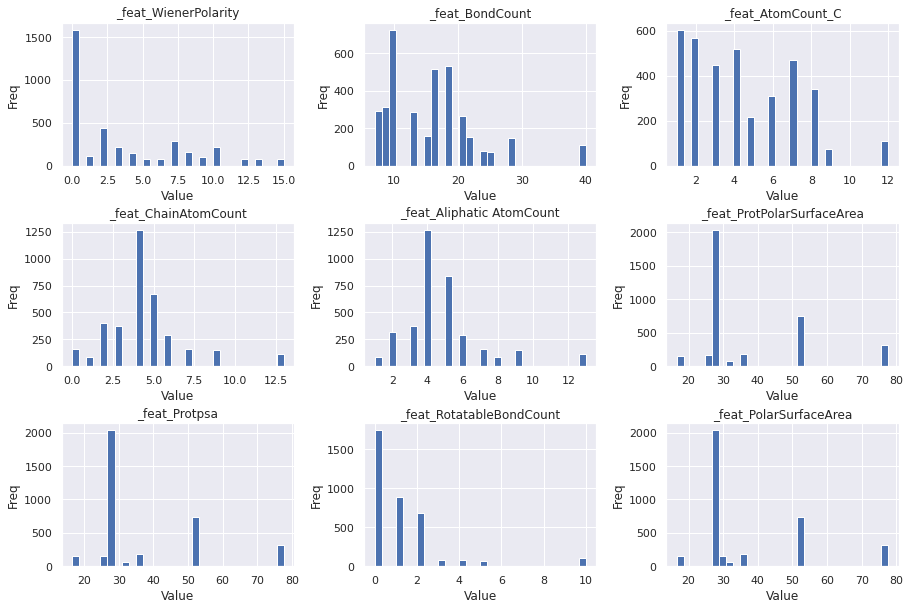

In [52]:
axs = df[to_check_feats].hist(bins=30, figsize=(15, 10))
plt.subplots_adjust(hspace = 0.4)
for ax in axs.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Freq")

### Categorical plot

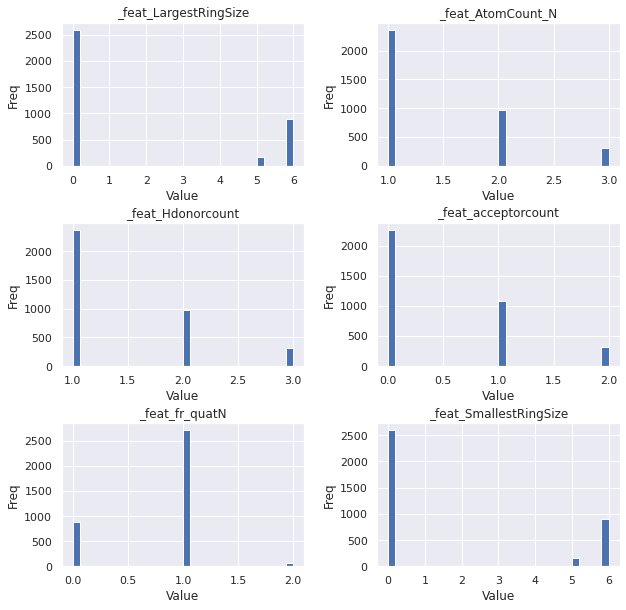

In [57]:
axs = df[categorical_feats[:6]].hist(bins=30, figsize=(10, 10))
plt.subplots_adjust(hspace = 0.4)
for ax in axs.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Freq")

### Continuous variables plot

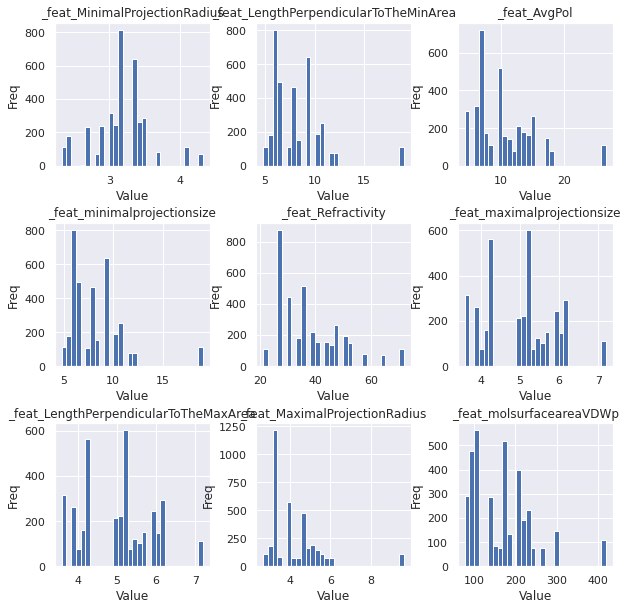

In [60]:
axs = df[continuous_feats[:9]].hist(bins=30, figsize=(10, 10))
plt.subplots_adjust(hspace = 0.4)
for ax in axs.flatten():
    ax.set_xlabel("Value")
    ax.set_ylabel("Freq")

### Feature importance

In [115]:
importance_feat_file = 'notebooks/results/fetures_sorted_by_weight.csv'
feat_importance = pd.read_csv(importance_feat_file)

In [116]:
feat_importance.head()

,feature,weight
0,_rxn_M_organic,0.222841
1,_rxn_M_inorganic,0.202689
2,_rxn_M_acid,0.162786
3,_feat_ASA-,0.146227
4,_feat_BalabanIndex,0.026015


In [117]:
len(feat_importance)

77

In [118]:
data = {'feature': phy_chem_cols, 'count_values': unique_col_counts}
cols_count_df = pd.DataFrame.from_dict(data)
cols_count_df.head()

,feature,count_values
0,_feat_MinimalProjectionRadius,25
1,_feat_LargestRingSize,3
2,_feat_HeteroaliphaticRingCount,2
3,_feat_LengthPerpendicularToTheMinArea,28
4,_feat_fr_dihydropyridine,1


In [119]:
len(cols_count_df)

67

In [120]:
cols_count_df.dtypes

feature         object
count_values     int64
dtype: object

In [121]:
feat_importance.dtypes

feature     object
weight     float64
dtype: object

In [122]:
cols_count_df = cols_count_df.merge(feat_importance, how='left', on='feature')

In [123]:
#cols_count_df = cols_count_df.sort_values(by=['weight', 'count_values'], ascending=False)
cols_count_df.head()

,feature,count_values,weight
54,_feat_ASA-,29,0.146227
34,_feat_BalabanIndex,21,0.026015
13,_feat_CarboaliphaticRingCount,2,0.019689
50,_feat_ASA_H,29,0.014964
48,_feat_ASA,29,0.014606


In [124]:
len(cols_count_df)

67

[Text(0.5, 0, 'Peso del feature'),
 Text(0, 0.5, 'Cantidad de valores distintos del feature')]

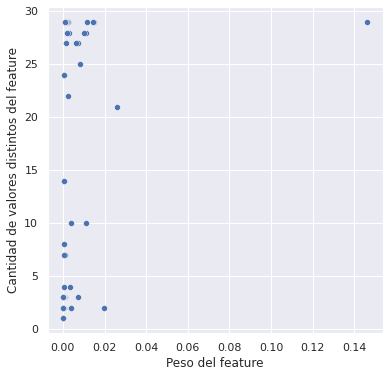

In [126]:
ax = sns.scatterplot(data = cols_count_df, x = 'weight', y='count_values')
ax.set(xlabel='Peso del feature', ylabel='Cantidad de valores distintos del feature')

In [ ]:
# aplicar tranformación